# BACS2033 Articial Intelligence
## Heart Disease Prediction
#### Group Member: Lee Gim Sheng, Loh Keat Siang and Vengades a/l Balamuraly




# Import Necessery Libraries

In [1]:
import pandas as pd  # For handling and processing datasets (reading CSV and DataFrames)
import numpy as np  # For numerical operations (math functions purposes)
import matplotlib.pyplot as plt  # For creating visual plots (diagrams)
import seaborn as sns  # For statistical data visualization (boxplot etc.)
from sklearn.model_selection import train_test_split  # split data into training and testing sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # for feature scaling (normalization)
from sklearn.impute import SimpleImputer  # for handling missing values
from sklearn.linear_model import LogisticRegression  # Logistic Regression (LR)
from sklearn.ensemble import RandomForestClassifier  # Random Forest (RF)
from sklearn.svm import SVC  # Support Vector Machine (SVM)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay, classification_report, roc_curve, auc
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

print("OK")

OK


# Data Preprocessing

## Dataset Preparation

### Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("HeartDiseaseDataset.csv")

In [3]:
# Set Pandas option to limit the number of rows displayed
pd.set_option('display.max_rows', 10)

# Display dataset with first and last 5 rows
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Cleaning

In [5]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### To check any missing value

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
           ..
oldpeak     0
slope       0
ca          0
thal        0
target      0
Length: 14, dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

#### To removing duplicate rows


In [11]:
# Count duplicate rows
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Confirm removal
print("Duplicate rows after removal:", df.duplicated().sum())


# Get examples of people without heart disease from your dataset
print("Records remaining after cleaning:", df.shape[0])

Duplicate rows before removal: 0
Duplicate rows after removal: 0
Records remaining after cleaning: 303


#### Dataset Overview: Structure and Target Distribution

##### key columns

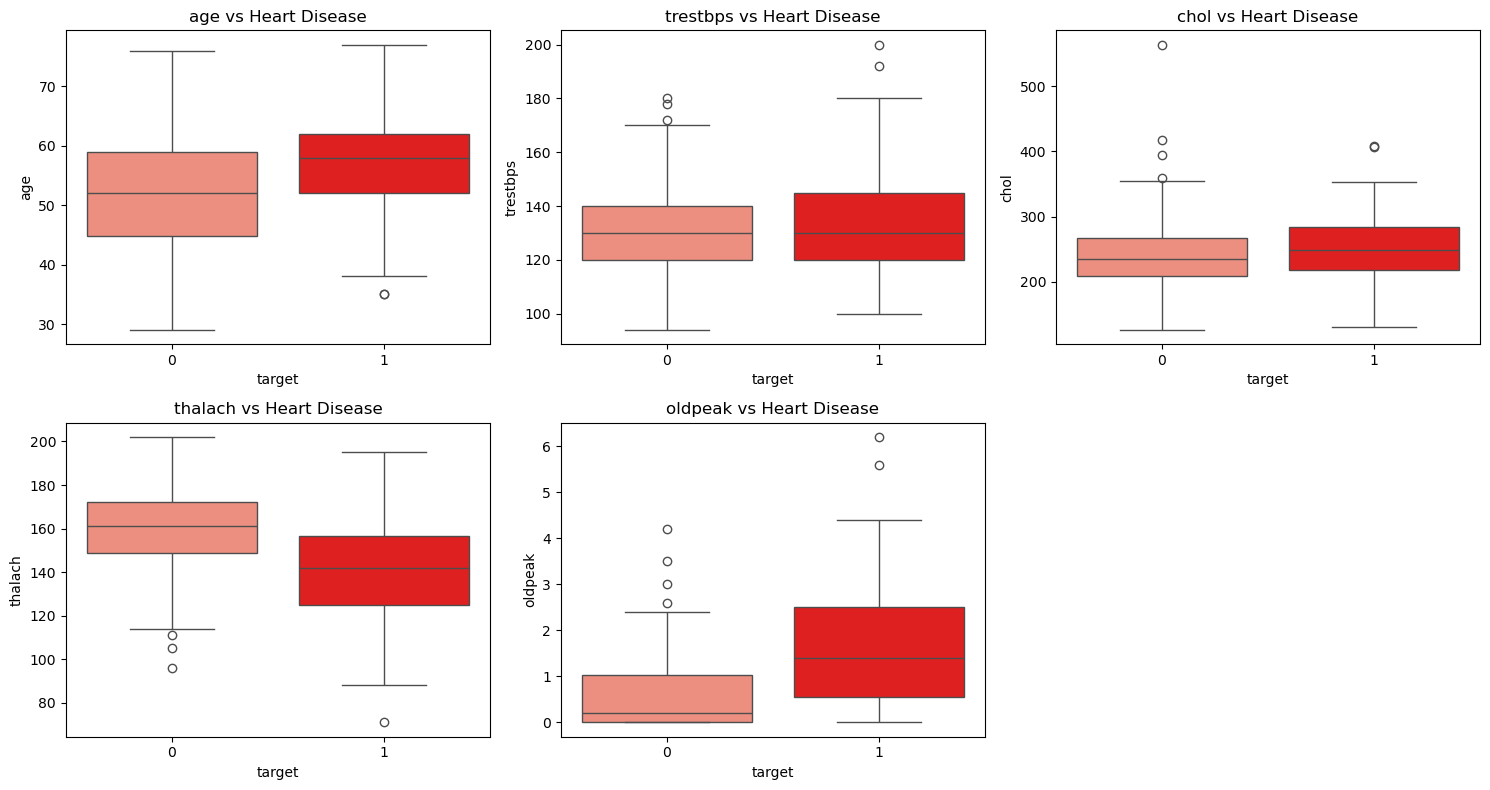

In [12]:

# Plot distributions for key numerical features
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, hue='target', data=df, palette=['#ff826e', 'red'], legend=False)
    plt.title(f'{col} vs Heart Disease')
plt.tight_layout()
plt.show()

# Data Analysis (EDA)

## Data Visualization

### Univariate Analysis

#### 1. Countplot  (Categorical)

* Why use countplot?
    - Identify Trends & Patterns
    - Detect Imbalanced Data
    - Enhance Model Performance

##### i. Targeted Heart Disease Person 

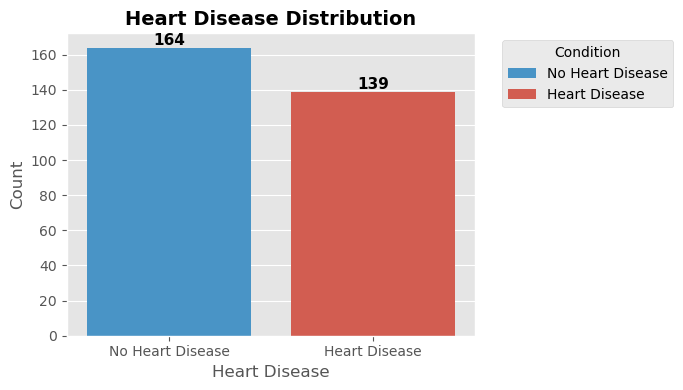

In [13]:
# Set visualization style
plt.style.use("ggplot")
sns.set_palette("pastel")

# Create countplot for target variable
fig, ax = plt.subplots(figsize=(7, 4))  
ax = sns.countplot(x="target", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No Heart Disease", "Heart Disease"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  # Avoid zero labels
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize legend & move it outside
plt.legend(["No Heart Disease", "Heart Disease"], title="Condition", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to center the plot
plt.tight_layout()
plt.show()


##### ii. Gender

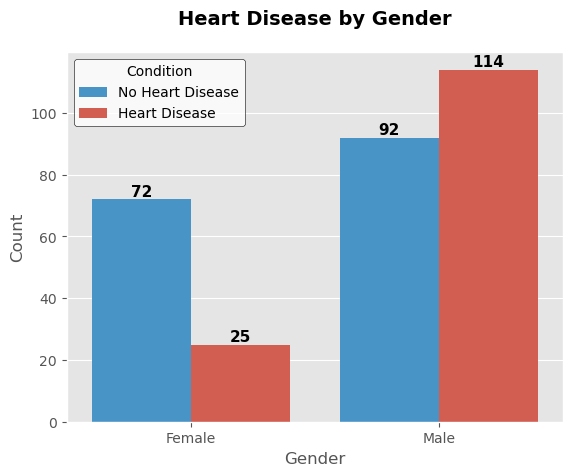

In [14]:
# Create countplot for gender with heart disease distribution
ax = sns.countplot(x="sex", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease by Gender", fontsize=14, fontweight='bold', pad=20)  # Add padding to move graph down
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize legend: Place inside at top-right without blocking bars
legend = plt.legend(["No Heart Disease", "Heart Disease"], 
                    title="Condition", loc="upper left", frameon=True, fontsize=10)

# Make legend background white and text black
legend.get_frame().set_facecolor("white")  # White background
legend.get_frame().set_edgecolor("black")  # Black border
for text in legend.get_texts():
    text.set_color("black")  # Set legend text color to black

# Adjust layout to shift graph down and fit legend nicelyplt.subplots_adjust(top=0.85)  # Push graph down to fit legend at top

plt.show()


##### iii. Chect Pain Types

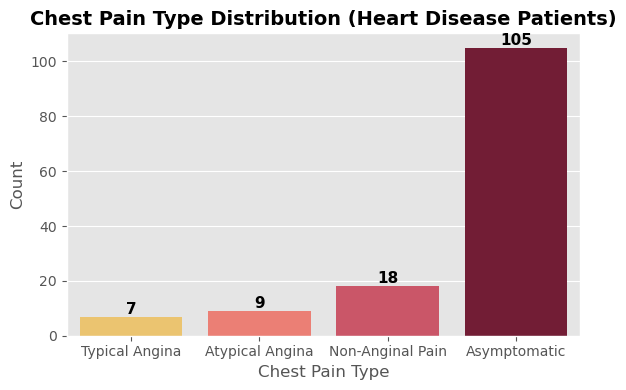

In [15]:
# Filter only patients with heart disease
heart_disease_df = df[df["target"] == 1]

# Define new colors (more aesthetically pleasing)
cp_colors = ["#ffcc5c", "#ff6f61", "#de425b", "#800f2f"]  # Light to dark red gradient

# Create countplot for Chest Pain Type (cp)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="cp", data=heart_disease_df, hue="cp", palette=cp_colors, legend=False)

# Improve labels and title
plt.title("Chest Pain Type Distribution (Heart Disease Patients)", fontsize=14, fontweight='bold')
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Customize x-axis labels for better readability
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


##### iv. Fasting Blood Sugar 

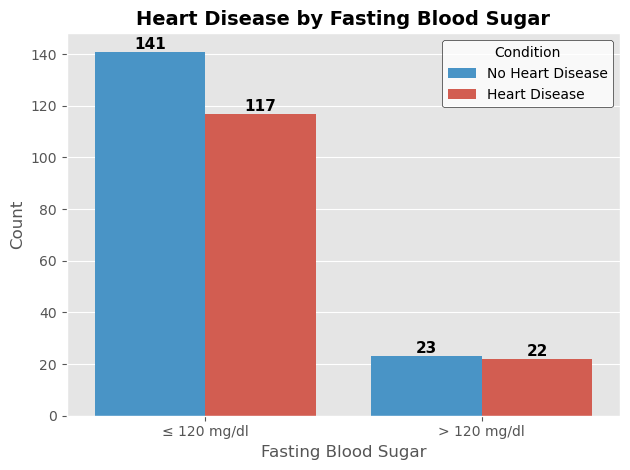

In [16]:
# Create countplot for Fasting Blood Sugar
ax = sns.countplot(x="fbs", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease by Fasting Blood Sugar", fontsize=14, fontweight='bold')
plt.xlabel("Fasting Blood Sugar", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["≤ 120 mg/dl", "> 120 mg/dl"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize legend: Move to top-right, add a white background and black text
legend = plt.legend(["No Heart Disease", "Heart Disease"], 
                    title="Condition", loc="upper right", frameon=True, fontsize=10)

# Make legend background white and text black
legend.get_frame().set_facecolor("white")  # White background
legend.get_frame().set_edgecolor("black")  # Black border
for text in legend.get_texts():
    text.set_color("black")  # Set legend text color to black

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


##### v. Resting ECG 

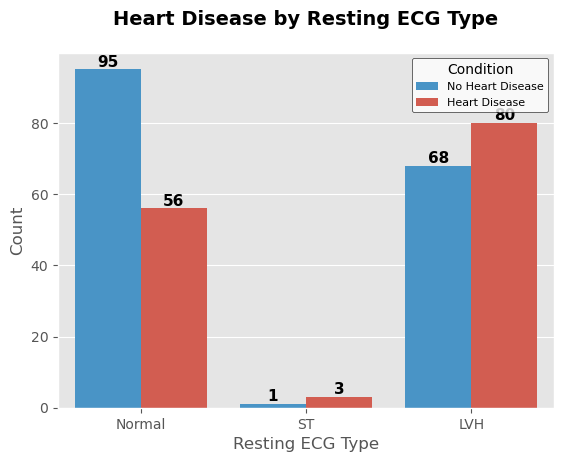

In [17]:
# Create countplot for Resting ECG
ax = sns.countplot(x="restecg", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease by Resting ECG Type", fontsize=14, fontweight='bold', pad=20)  # Add padding to shift graph down
plt.xlabel("Resting ECG Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Normal", "ST", "LVH"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize legend: Place inside at top-right without blocking bars
legend = plt.legend(["No Heart Disease", "Heart Disease"], 
                    title="Condition", loc="upper right", frameon=True, fontsize=8)

# Make legend background white and text black
legend.get_frame().set_facecolor("white")  # White background
legend.get_frame().set_edgecolor("black")  # Black border
for text in legend.get_texts():
    text.set_color("black")  # Set legend text color to black

# Adjust layout to shift graph down and fit legend nicely
plt.subplots_adjust(top=0.85)  # Push graph down to fit legend at top

plt.show()


##### vi. Exercise-Induced Angina

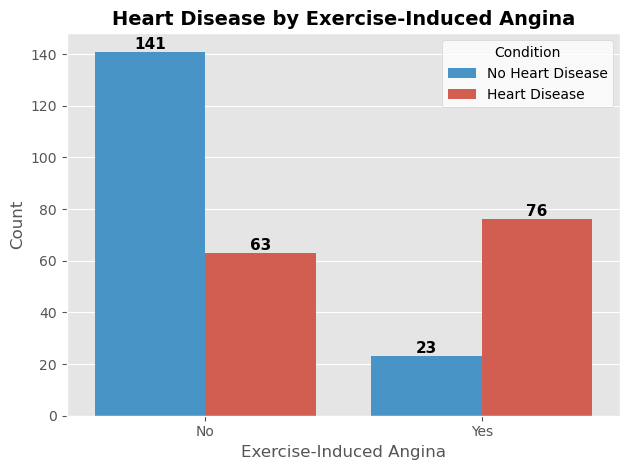

In [18]:
# Create countplot for Exercise-Induced Angina
ax = sns.countplot(x="exang", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease by Exercise-Induced Angina", fontsize=14, fontweight='bold')
plt.xlabel("Exercise-Induced Angina", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize the legend and position it properly
plt.legend(["No Heart Disease", "Heart Disease"], title="Condition", 
           loc="upper right", frameon=True, facecolor="white")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


##### vii. Slope of ST Segment

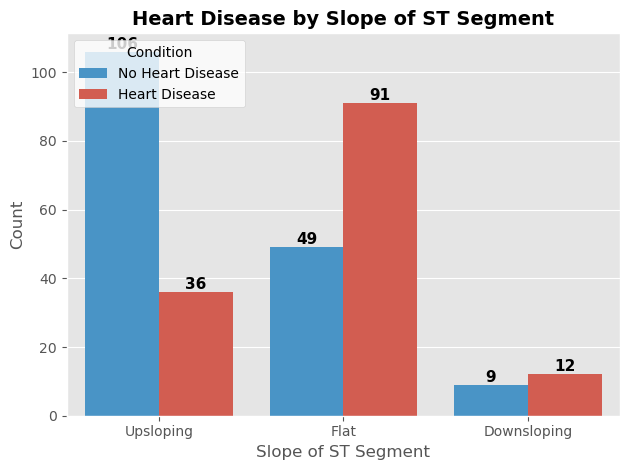

In [19]:
# Create countplot for Slope of ST Segment
ax = sns.countplot(x="slope", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease by Slope of ST Segment", fontsize=14, fontweight='bold')
plt.xlabel("Slope of ST Segment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Upsloping", "Flat", "Downsloping"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize the legend and position it properly
plt.legend(["No Heart Disease", "Heart Disease"], title="Condition", 
           loc="upper left", frameon=True, facecolor="white")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


##### viii. Thalassemia 

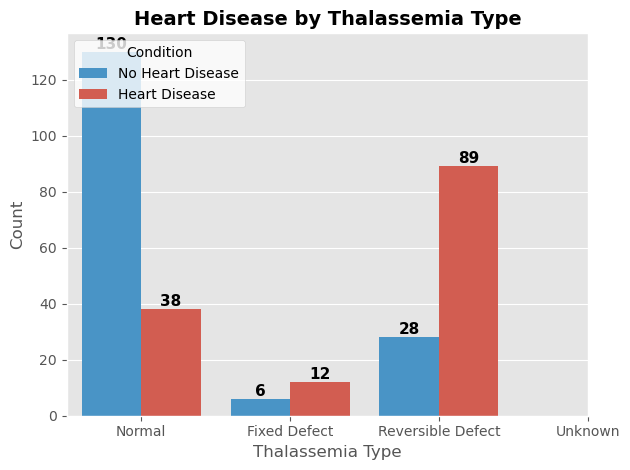

In [20]:
# Create countplot for Thalassemia
ax = sns.countplot(x="thal", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease by Thalassemia Type", fontsize=14, fontweight='bold')
plt.xlabel("Thalassemia Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Normal", "Fixed Defect", "Reversible Defect", "Unknown"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize the legend and position it properly
plt.legend(["No Heart Disease", "Heart Disease"], title="Condition", 
           loc="upper left", frameon=True, facecolor="white")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


##### ix. Number of Vessels

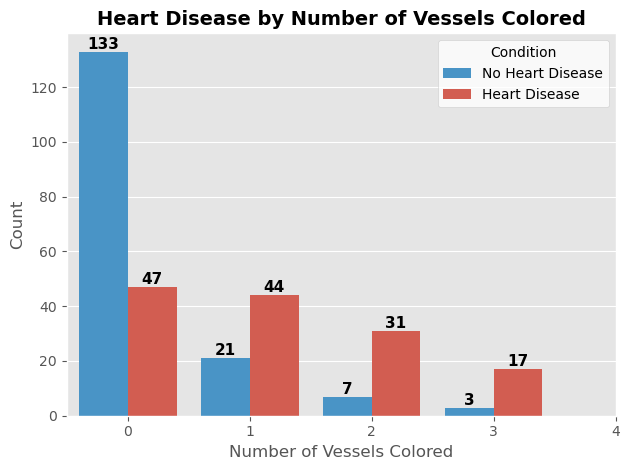

In [21]:
# Create countplot for Number of Vessels
ax = sns.countplot(x="ca", data=df, hue="target", palette=["#3498db", "#e74c3c"])

# Improve labels and title
plt.title("Heart Disease by Number of Vessels Colored", fontsize=14, fontweight='bold')
plt.xlabel("Number of Vessels Colored", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0", "1", "2", "3", "4"])

# Annotate only the maximum values per category
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize the legend and position it properly
plt.legend(["No Heart Disease", "Heart Disease"], title="Condition", 
           loc="upper right", frameon=True, facecolor="white")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


#### 2. Distribution of Key Numerical Features (Continuous Values)

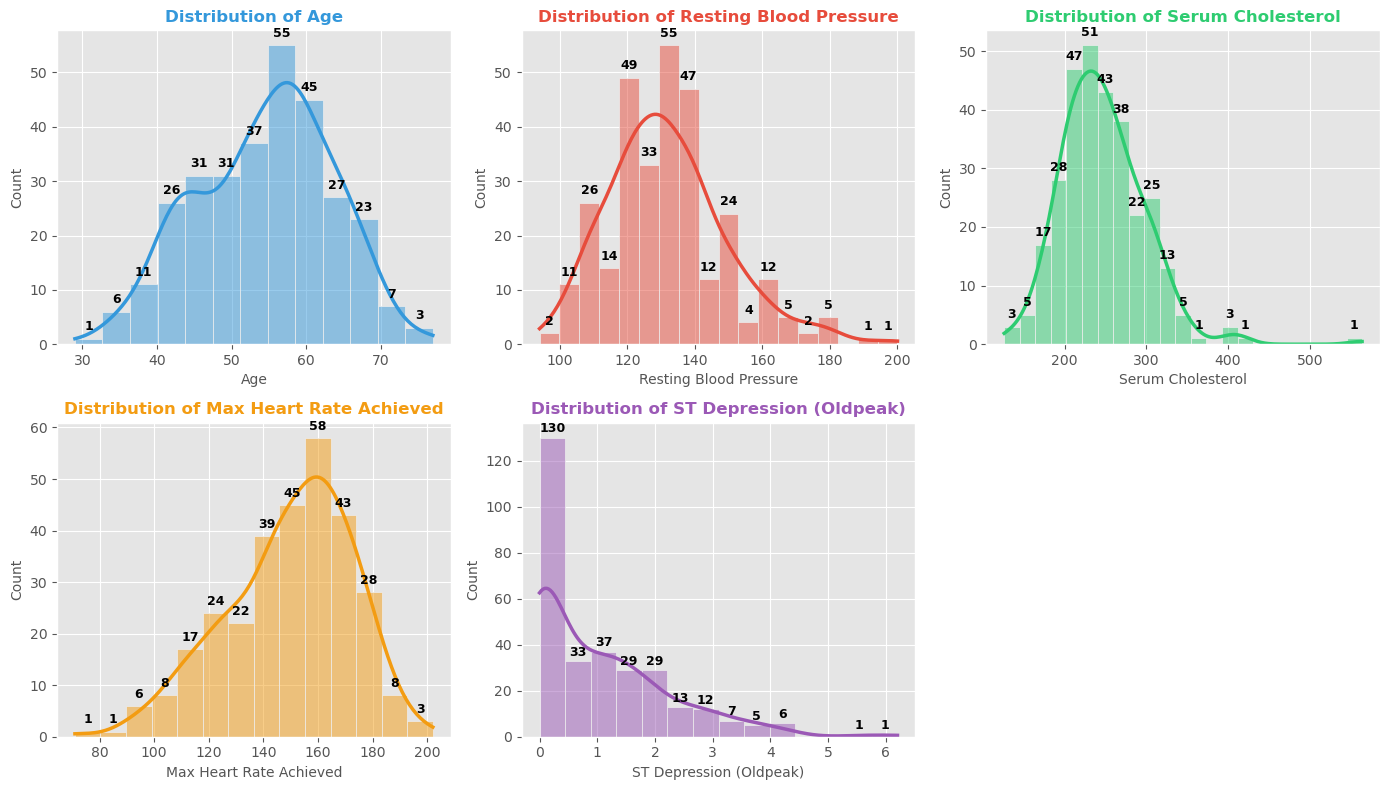

In [22]:
# Set Seaborn style
plt.style.use("ggplot")
sns.set_palette("pastel")

# Define readable column names
column_names = {
    "age": "Age",
    "trestbps": "Resting Blood Pressure",
    "chol": "Serum Cholesterol",
    "thalach": "Max Heart Rate Achieved",
    "oldpeak": "ST Depression (Oldpeak)"
}

# List of numerical columns
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"] 

# Create figure
plt.figure(figsize=(14, 8))

for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    
    # Histogram + KDE
    ax = sns.histplot(df[col], bins='auto', kde=True, color=colors[i-1], line_kws={"linewidth": 2.5})
    
    # Annotate bars with counts (avoid clutter)
    for patch in ax.patches:
        if patch.get_height() > 0:  # Avoid zero-height bars
            height = patch.get_height()
            ax.annotate(f"{int(height)}", 
                        (patch.get_x() + patch.get_width() / 2, height + 1),  
                        ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

    # Title & labels
    plt.title(f"Distribution of {column_names[col]}", fontsize=12, fontweight='bold', color=colors[i-1])
    plt.xlabel(column_names[col], fontsize=10)
    plt.ylabel("Count", fontsize=10)

plt.tight_layout()
plt.show()


##### To detecting and treating outliers

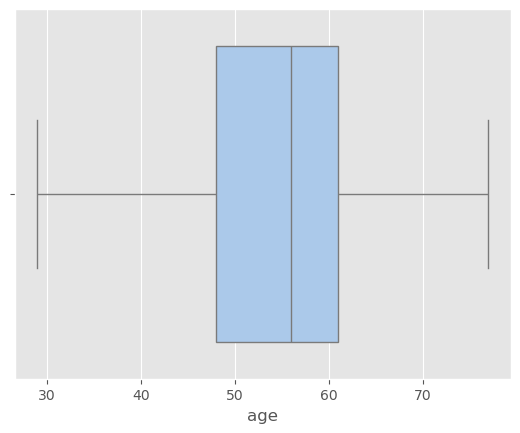

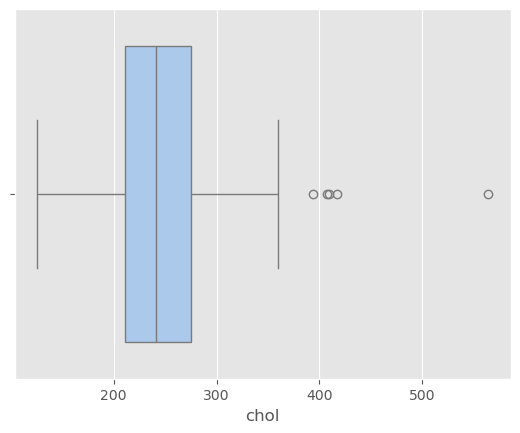

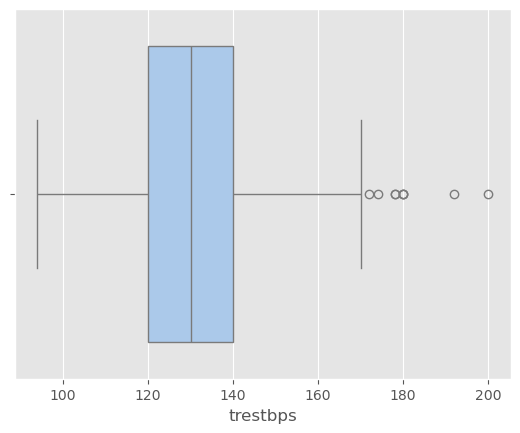

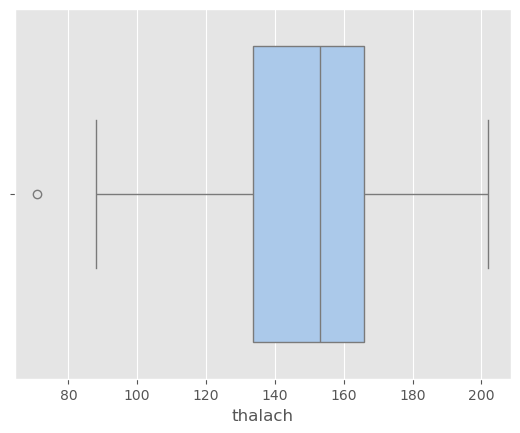

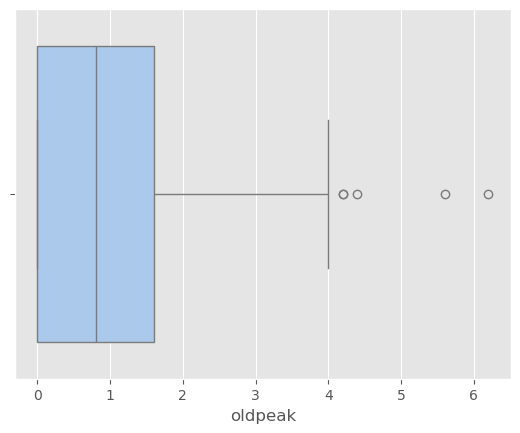

In [23]:
# Define function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Visualize outliers
for col in ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']:
    sns.boxplot(x=df[col])
    plt.show()

# Apply outlier removal
for col in ['chol', 'trestbps', 'thalach', 'oldpeak']:
    df = remove_outliers(df, col)


### Bivariate Analysis

#### 1. Numerical vs Numerical

##### i. Age vs Cholesterol (colored by Heart Disease)

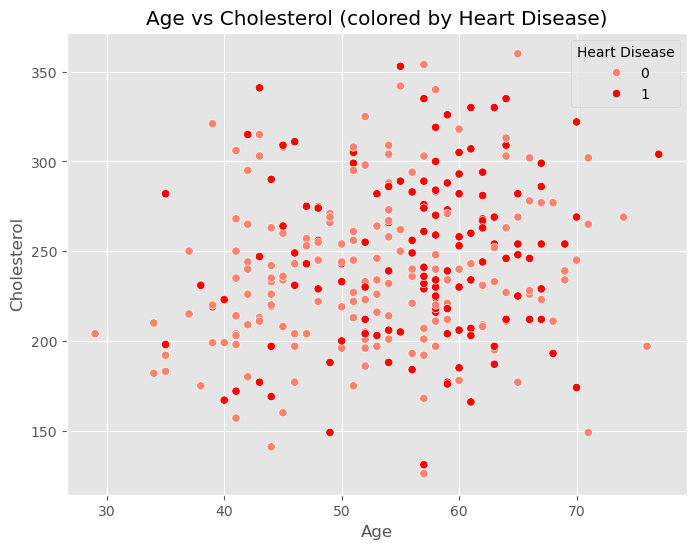

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=df, palette=['#ff826e', 'red'])
plt.title('Age vs Cholesterol (colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease')
plt.grid(True)
plt.show()

##### ii. Numerical Features Pairwise Plot (Colored by Target)

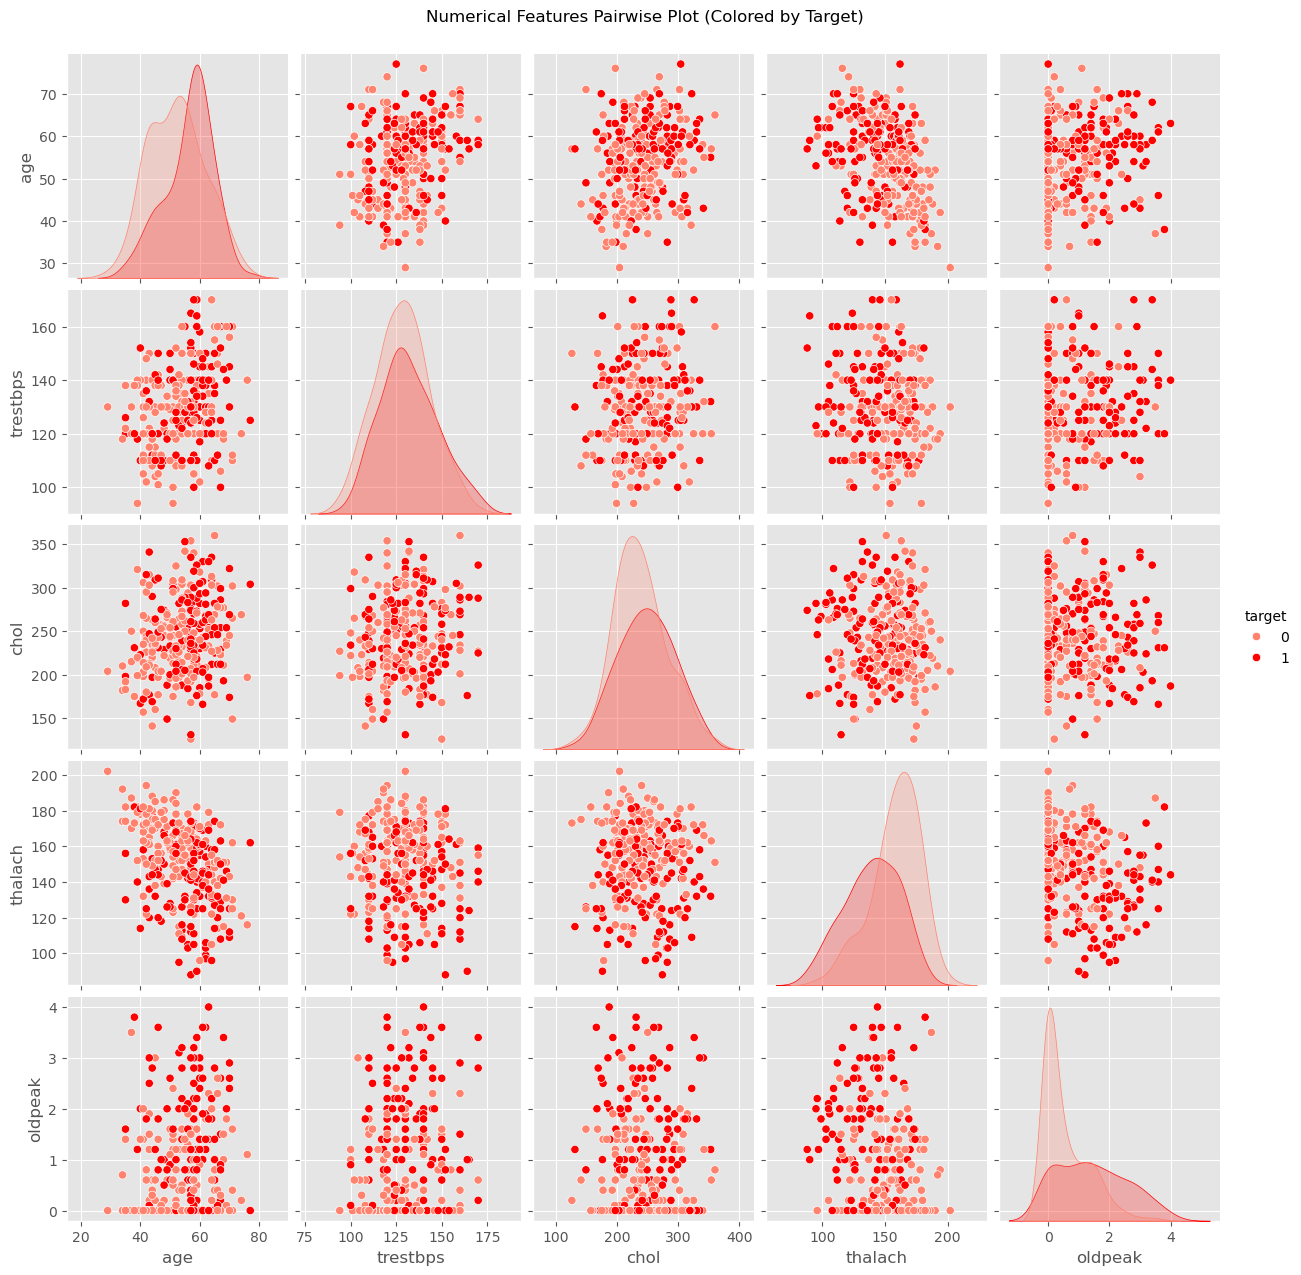

In [25]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

sns.pairplot(df[num_cols + ['target']], hue='target', palette=['#ff826e', 'red'])
plt.suptitle("Numerical Features Pairwise Plot (Colored by Target)", y=1.02)
plt.show()

##### iii. Correlation Matrix (Numerical Features)

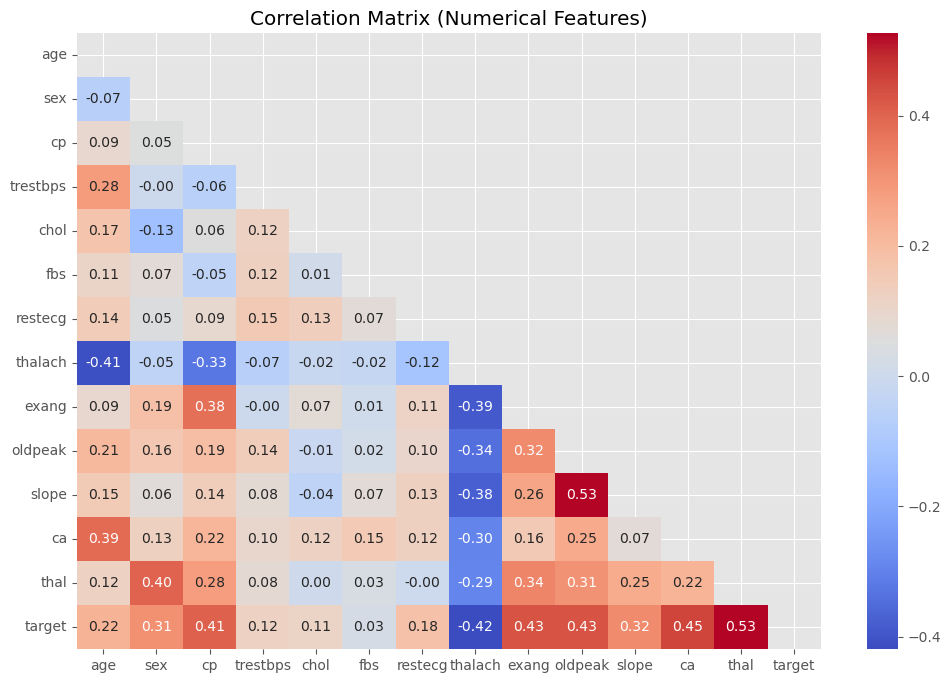

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', mask=np.triu(df.corr(numeric_only=True)))
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

##### iv. Oldpeak vs Max Heart Rate with Regression

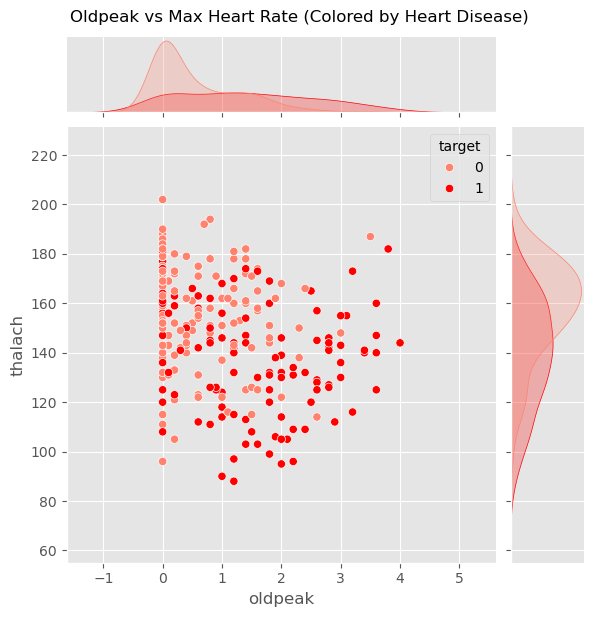

In [27]:
sns.jointplot(data=df, x='oldpeak', y='thalach', hue='target', kind='scatter', palette=['#ff826e', 'red'])
plt.suptitle('Oldpeak vs Max Heart Rate (Colored by Heart Disease)', y=1.02)
plt.show()

#### 2. Category vs Numerical

##### i. Comparison of Numerical Features by Heart Disease Status

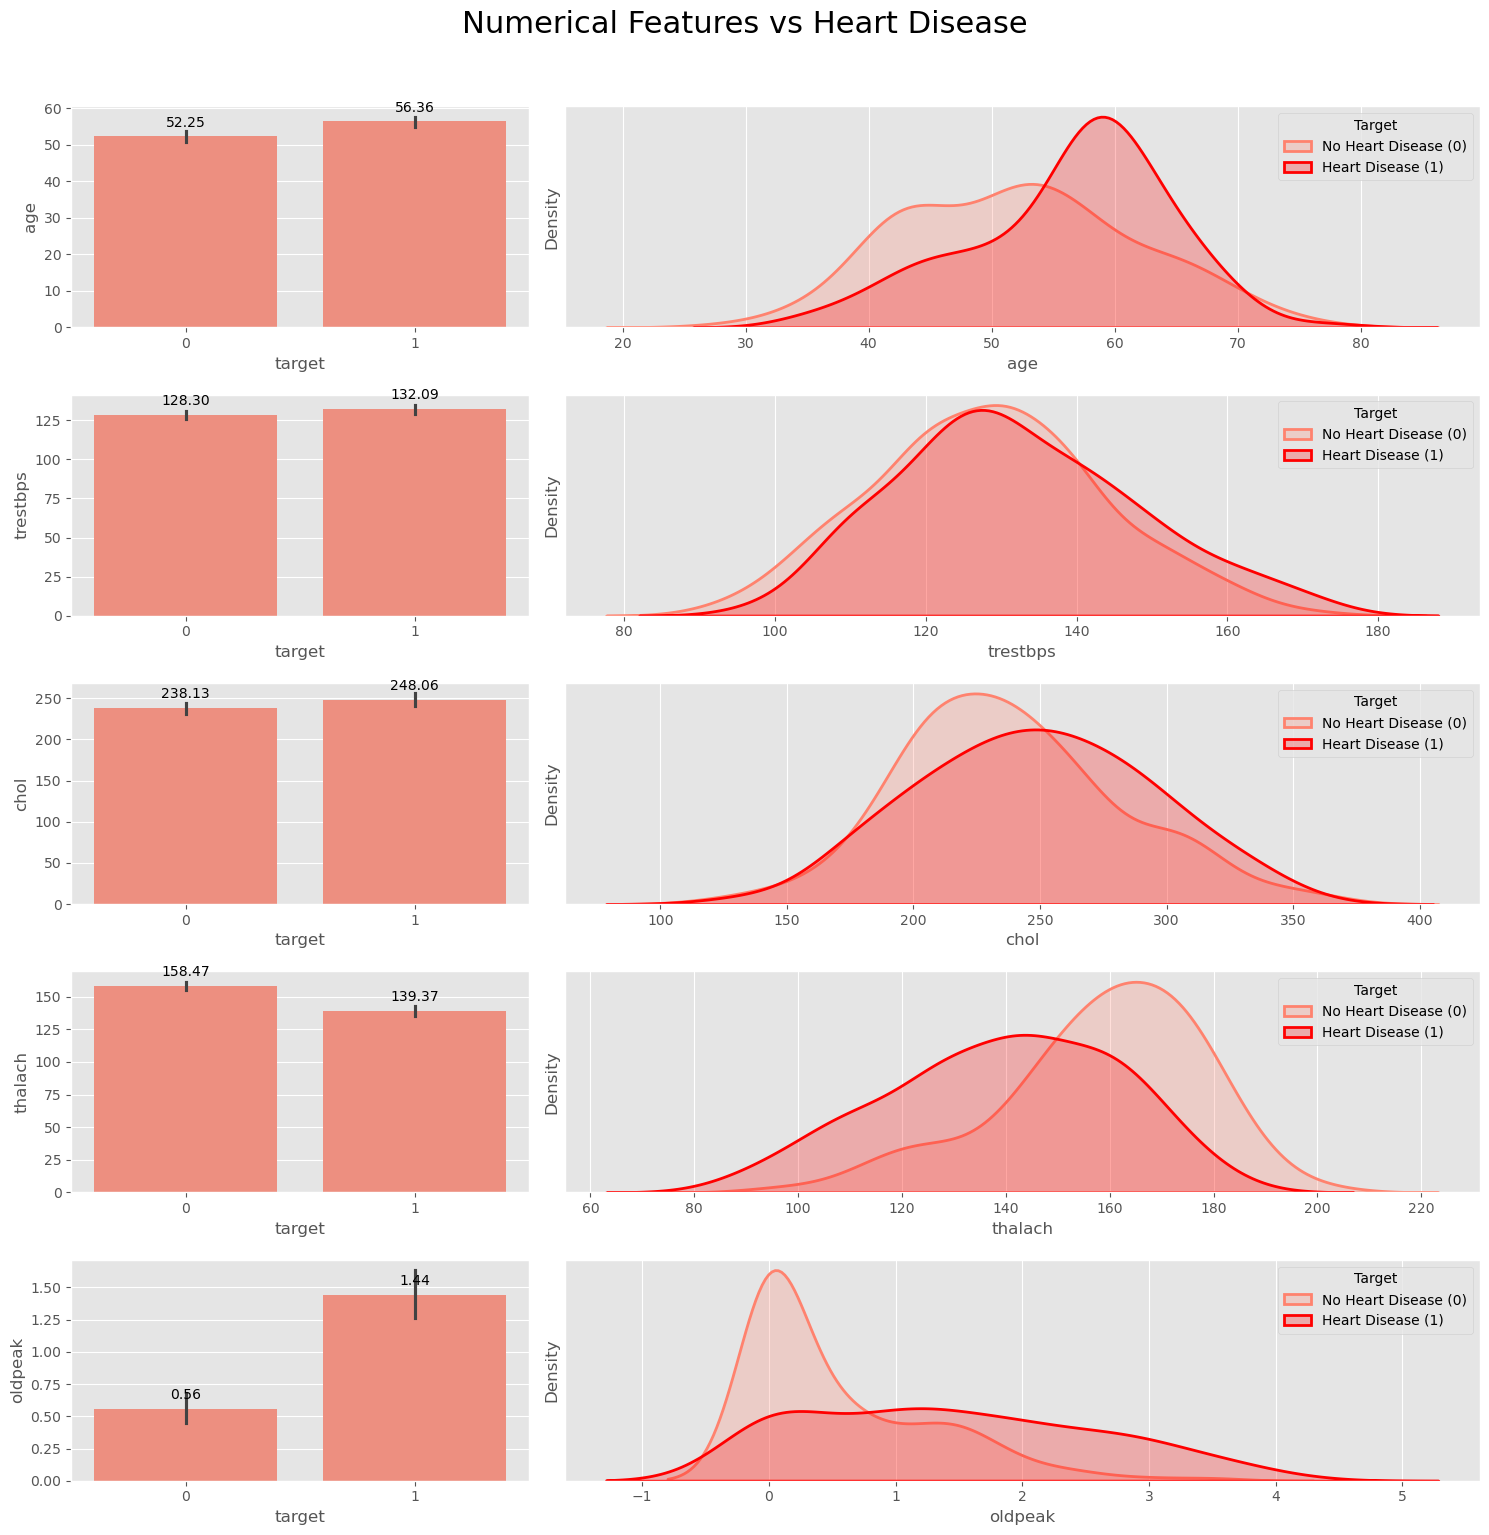

In [28]:
# Barplots: Quickly compare average values between groups.
# Example: If the mean trestbps (blood pressure) is much higher for target=1, this could indicate a trend.
# KDE Plots: Reveal overlaps/differences in distributions (e.g., skewness, peaks, spread).
# Example: If the age distribution for target=1 is shifted right, older age might correlate with heart disease.
# Barplot: If the mean oldpeak is higher for target=1, it suggests heart disease patients experience more ST depression.
# KDE Plot: If the distribution for target=1 is shifted right, it reinforces that higher oldpeak values are more common in heart disease cases.
# Define continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 2]})

# Generate plots
for i, col in enumerate(continuous_features):
    # Barplot (mean value per group)
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i, 0])
    
    # KDE plot (distribution per group)
    sns.kdeplot(data=df[df["target"] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='No Heart Disease (0)')
    sns.kdeplot(data=df[df["target"] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='Heart Disease (1)')
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Target', loc='upper right')
    
    # Add mean labels to barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.2f', padding=5)

plt.suptitle('Numerical Features vs Heart Disease', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

##### ii. cp (Chest Pain Type) vs thalach (Max Heart Rate)

C:\Users\OPIUM\AppData\Local\Temp\ipykernel_14704\2854383294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='thalach', data=df, palette='Set2')


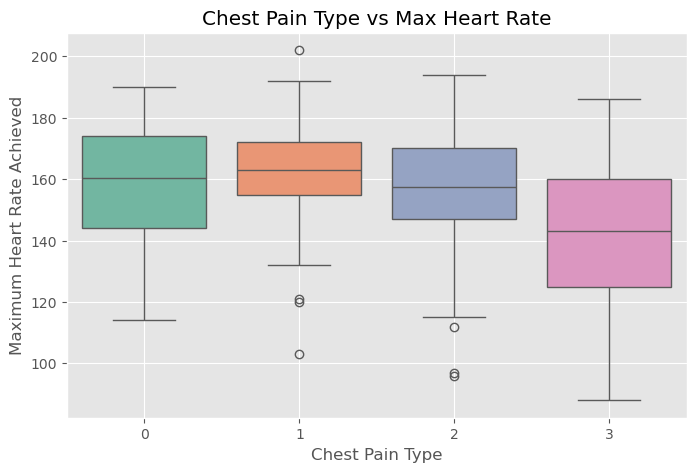

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cp', y='thalach', data=df, palette='Set2')
plt.title('Chest Pain Type vs Max Heart Rate')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate Achieved')
plt.grid(True)
plt.show()

##### iii. slope vs oldpeak

C:\Users\OPIUM\AppData\Local\Temp\ipykernel_14704\3692361330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='slope', y='oldpeak', data=df, palette='coolwarm')


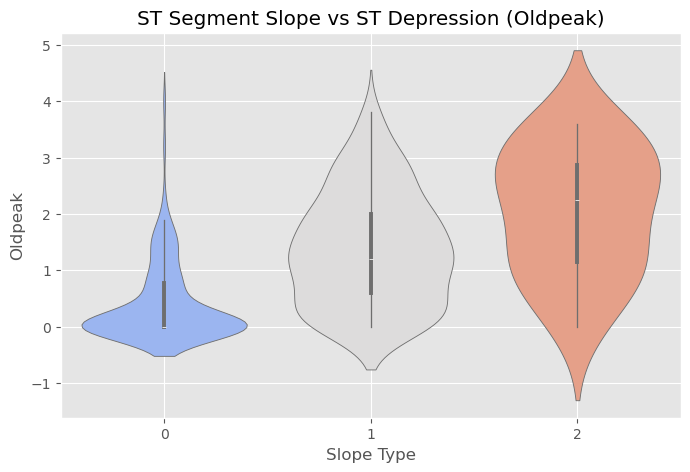

In [30]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='slope', y='oldpeak', data=df, palette='coolwarm')
plt.title('ST Segment Slope vs ST Depression (Oldpeak)')
plt.xlabel('Slope Type')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.show()

##### iv. thal vs chol (Cholesterol)

C:\Users\OPIUM\AppData\Local\Temp\ipykernel_14704\3788901954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='thal', y='chol', data=df, jitter=True, palette='viridis')


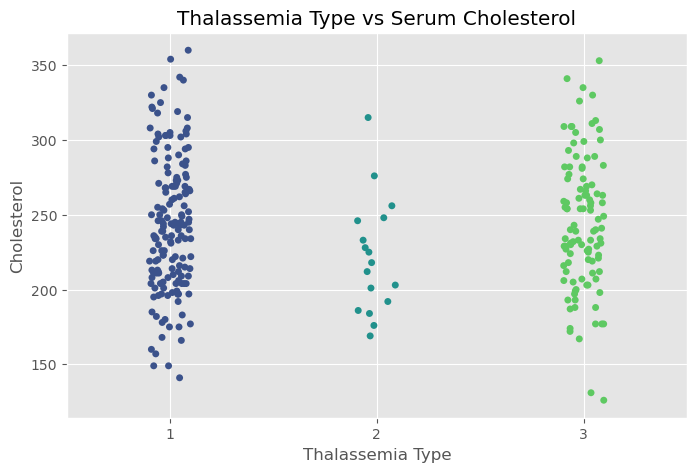

In [31]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='thal', y='chol', data=df, jitter=True, palette='viridis')
plt.title('Thalassemia Type vs Serum Cholesterol')
plt.xlabel('Thalassemia Type')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

##### v. sex vs trestbps (Resting BP)

C:\Users\OPIUM\AppData\Local\Temp\ipykernel_14704\225509663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sex', y='trestbps', data=df, palette=['#ff826e', 'red'])


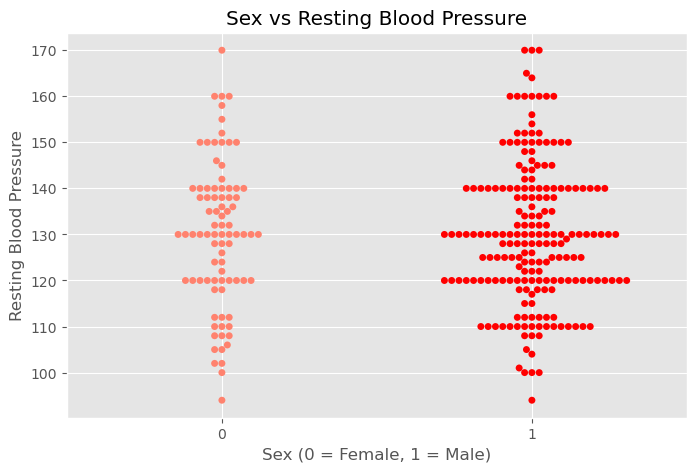

In [32]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x='sex', y='trestbps', data=df, palette=['#ff826e', 'red'])
plt.title('Sex vs Resting Blood Pressure')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Resting Blood Pressure')
plt.grid(True)
plt.show()

#### 3. Categorical vs Categorical

##### i. sex and heart disease (target) - Sankey Diagram

In [33]:
# Prepare the data
sex_to_target = df.groupby(['sex', 'target']).size().reset_index(name='count')

# Map numeric values to labels
sex_labels = {0: 'Female', 1: 'Male'}
target_labels = {0: 'No Disease', 1: 'Disease'}

# Create nodes and links
nodes = list(sex_labels.values()) + list(target_labels.values())
source_indices = sex_to_target['sex'].apply(lambda x: list(sex_labels.keys()).index(x))
target_indices = sex_to_target['target'].apply(lambda x: len(sex_labels) + list(target_labels.keys()).index(x))

fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=["#ff826e", "red", "#ff826e", "red"]  # Female, Male, No Disease, Disease
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=sex_to_target['count'],
        hovertemplate='%{source.label} → %{target.label}: %{value} patients<extra></extra>'
    )
))

# Add clinical annotations
annotations = [
    dict(
        x=0.15, y=0.9,
        xref="paper", yref="paper",
        text=f"Total Females: {len(df[df['sex']==0])}",
        showarrow=False,
        font=dict(size=12)
    ),
    dict(
        x=0.15, y=0.85,
        xref="paper", yref="paper",
        text=f"Total Males: {len(df[df['sex']==1])}",
        showarrow=False,
        font=dict(size=12)
    )
]

fig.update_layout(
    title_text="<b>Heart Disease Prevalence by Sex</b><br><sup>Flow from Biological Sex to Diagnosis</sup>",
    font=dict(size=14, family="Arial"),
    hovermode="x",
    annotations=annotations,
    height=500
)
female_risk = len(df[(df['sex']==0) & (df['target']==1)]) / len(df[df['sex']==0])
male_risk = len(df[(df['sex']==1) & (df['target']==1)]) / len(df[df['sex']==1])

print(f"Clinical Risk Ratio:\nMales are {male_risk/female_risk:.1f}x more likely to develop heart disease than females")
fig.show()

Clinical Risk Ratio:
Males are 2.6x more likely to develop heart disease than females


##### ii. Chest Pain Type (cp) - Radar Chart

In [34]:
# Prepare data
cp_counts = df.groupby(['cp', 'target']).size().unstack().fillna(0)

# Plot
categories = ['Asymptomatic','Typical Angina','Atypical Angina','Non-anginal']
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=cp_counts[0].values,
    theta=categories,
    fill='toself',
    name='No Disease',
    line_color='#ff826e'
))
fig.add_trace(go.Scatterpolar(
    r=cp_counts[1].values,
    theta=categories,
    fill='toself',
    name='Disease',
    line_color='red'
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title='Chest Pain Type Distribution by Heart Disease'
)
fig.show()

##### iii. Vessel Count (ca) - Heatmap

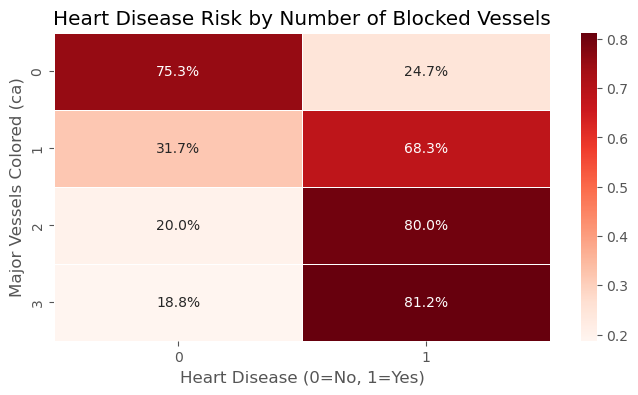

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(
    pd.crosstab(df['ca'], df['target'], normalize='index'),
    annot=True, 
    fmt=".1%",
    cmap="Reds",
    linewidths=0.5
)
plt.title('Heart Disease Risk by Number of Blocked Vessels')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Major Vessels Colored (ca)')
plt.show()

##### iv. Thalassemia (thal) - Stacked Bar Chart

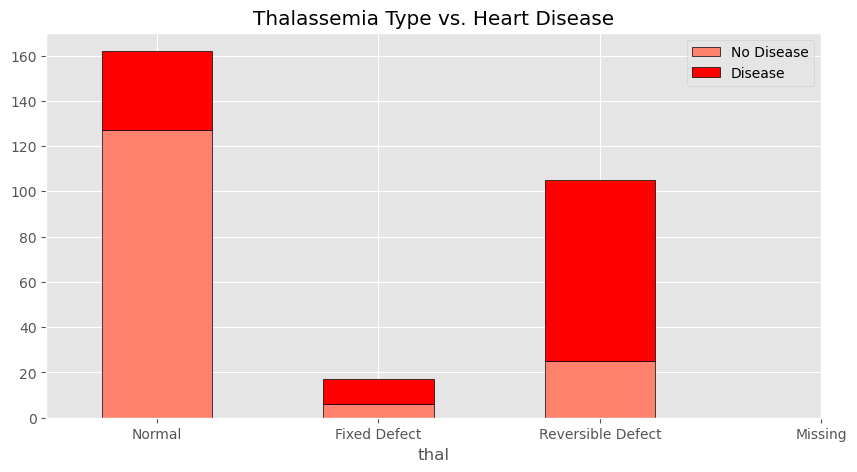

In [36]:
pd.crosstab(df['thal'], df['target']).plot(
    kind='bar', 
    stacked=True, 
    color=['#ff826e','red'],
    edgecolor='k',
    figsize=(10,5)
)
plt.title('Thalassemia Type vs. Heart Disease')
plt.xticks([0,1,2,3], ['Normal','Fixed Defect','Reversible Defect','Missing'], rotation=0)
plt.legend(['No Disease','Disease'])
plt.show()

##### v. Fasting Blood Sugar (fbs) - Proportional Donut Chart

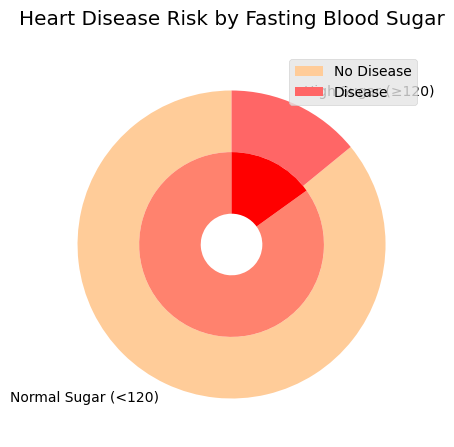

In [37]:
# Data prep
fbs_data = df.groupby(['fbs', 'target']).size().unstack()
labels = ['Normal Sugar (<120)', 'High Sugar (≥120)']
colors = ['#ffcc99', '#ff6666']

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(fbs_data.sum(axis=1), labels=labels, colors=colors,
       wedgeprops=dict(width=0.4), startangle=90)
ax.pie(fbs_data[1], radius=0.6, colors=['#ff826e', 'red'],
       wedgeprops=dict(width=0.4), startangle=90)
plt.title('Heart Disease Risk by Fasting Blood Sugar', pad=20)
ax.legend(['No Disease', 'Disease'], loc='upper right')
plt.show()

##### vi. Resting ECG (restecg) - Diverging Bar Chart

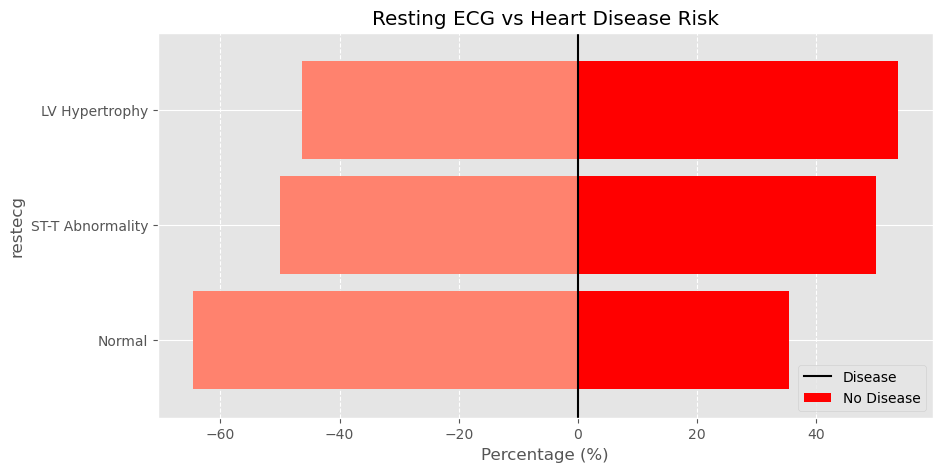

In [38]:
# Calculate percentages
restecg_pct = pd.crosstab(df['restecg'], df['target'], normalize='index')*100

# Plot
plt.figure(figsize=(10,5))
restecg_pct[1].plot(kind='barh', color='red', width=0.85)
plt.barh(restecg_pct.index, -restecg_pct[0], color='#ff826e', height=0.85)
plt.axvline(0, color='black', linestyle='-')
plt.title('Resting ECG vs Heart Disease Risk')
plt.yticks([0,1,2], ['Normal', 'ST-T Abnormality', 'LV Hypertrophy'])
plt.xlabel('Percentage (%)')
plt.legend(['Disease', 'No Disease'], loc='lower right')
plt.grid(axis='x', linestyle='--')
plt.show()

##### vii. Exercise-Induced Angina (exang) - Population Pyramid

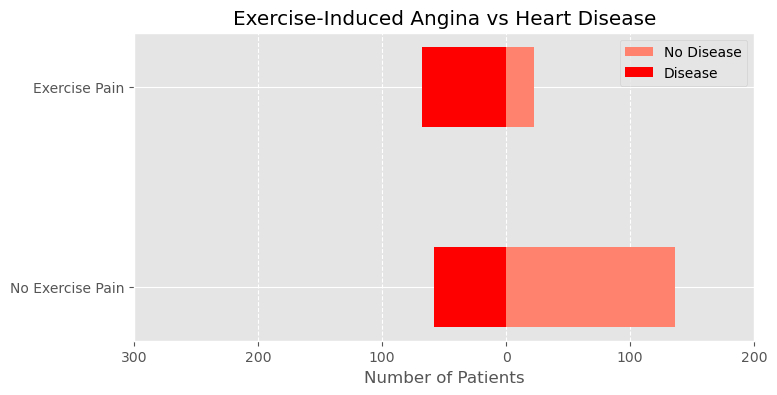

In [39]:
# Data prep
exang_counts = df.groupby(['exang', 'target']).size().unstack()

# Plot
fig, ax = plt.subplots(figsize=(8,4))
ax.barh([0,1], exang_counts[0], height=0.4, color='#ff826e', label='No Disease')
ax.barh([0,1], -exang_counts[1], height=0.4, color='red', label='Disease')
ax.set_yticks([0,1])
ax.set_yticklabels(['No Exercise Pain', 'Exercise Pain'])
ax.set_title('Exercise-Induced Angina vs Heart Disease')
ax.legend()
plt.xticks([-300, -200, -100, 0, 100, 200], [300, 200, 100, 0, 100, 200])
plt.xlabel('Number of Patients')
plt.grid(axis='x', linestyle='--')
plt.show()

##### viii. ST Slope (slope) - Radar Chart with Confidence Intervals

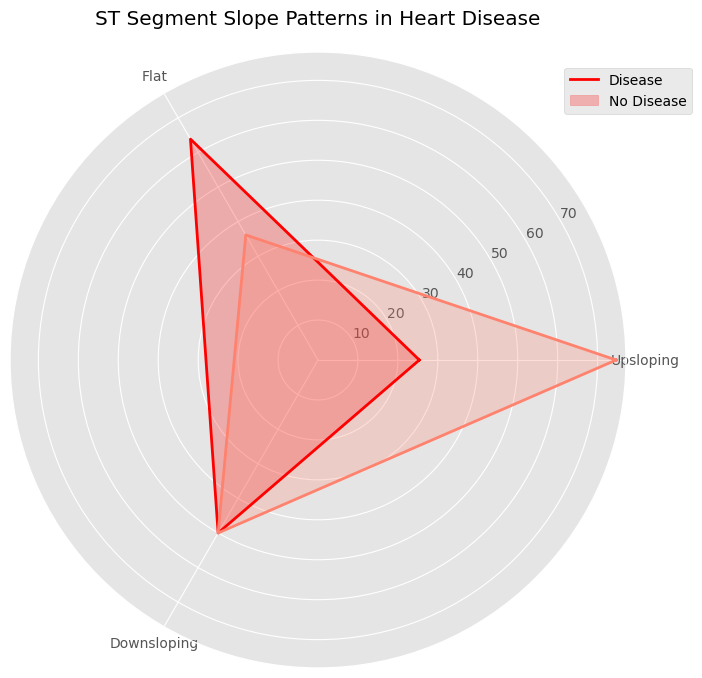

In [40]:
from math import pi

# Calculate proportions
slope_pct = pd.crosstab(df['slope'], df['target'], normalize='index')*100
categories = ['Upsloping', 'Flat', 'Downsloping']
angles = [n/3*2*pi for n in range(3)] + [0]  # Close the loop

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

# Plot disease group
ax.plot(angles, slope_pct[1].tolist()+[slope_pct[1][0]], color='red', linewidth=2)
ax.fill(angles, slope_pct[1].tolist()+[slope_pct[1][0]], color='red', alpha=0.25)

# Plot no disease group
ax.plot(angles, slope_pct[0].tolist()+[slope_pct[0][0]], color='#ff826e', linewidth=2)
ax.fill(angles, slope_pct[0].tolist()+[slope_pct[0][0]], color='#ff826e', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_rlabel_position(30)
plt.title('ST Segment Slope Patterns in Heart Disease', pad=20)
plt.legend(['Disease', 'No Disease'], loc=(0.9,0.9))
plt.show()

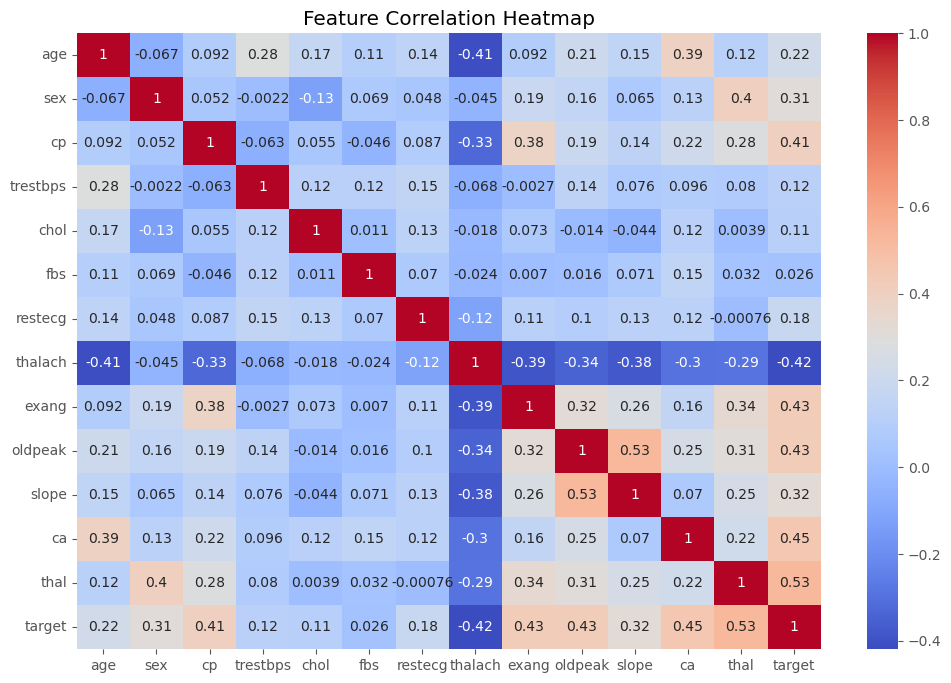

age: Age of the patient
sex: Sex (1: Male, 0: Female)
cp: Chest pain type (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal pain, 3: Asymptomatic)
trestbps: Resting blood pressure (in mm Hg)
chol: Serum cholesterol level (mg/dl)
fbs: Fasting blood sugar (>120 mg/dl, 1 = True, 0 = False)
restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)
thalach: Maximum heart rate achieved
exang: Exercise-induced angina (1 = Yes, 0 = No)
oldpeak: Oldpeak (ST depression induced by exercise relative to rest)
slope: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)
ca: Number of major vessels (0-3) colored by fluoroscopy
thal: Thalassemia (0: Normal, 1: Fixed defect, 2: Reversible defect)
target: Target (0 = No heart disease, 1 = Heart disease)


In [41]:
##### Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
feature_info = [
    "Age of the patient",
    "Sex (1: Male, 0: Female)",
    "Chest pain type (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal pain, 3: Asymptomatic)",
    "Resting blood pressure (in mm Hg)",
    "Serum cholesterol level (mg/dl)",
    "Fasting blood sugar (>120 mg/dl, 1 = True, 0 = False)",
    "Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)",
    "Maximum heart rate achieved",
    "Exercise-induced angina (1 = Yes, 0 = No)",
    "Oldpeak (ST depression induced by exercise relative to rest)",
    "Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)",
    "Number of major vessels (0-3) colored by fluoroscopy",
    "Thalassemia (0: Normal, 1: Fixed defect, 2: Reversible defect)",
    "Target (0 = No heart disease, 1 = Heart disease)" 
]

# Print feature names with descriptions
for i, col in enumerate(df.columns):
    print(f"{col}: {feature_info[i]}")


# Spliting Data

In [42]:
# Define feature columns (X) and target column (y)
X = df.drop(columns=['target'])  # Drop target column to keep only features
y = df['target']  # Target variable

In [43]:
# Split data using only original features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Original feature set shape: {X.shape}")

Original feature set shape: (284, 13)


In [44]:
# Define more distinct parameter grids
param_grid_svm = {
    "svm__C": [0.1, 1, 10, 100],  
    "svm__gamma": ["scale", 0.001, 0.01, 0.1],
    "svm__kernel": ["rbf", "poly"],
    "svm__class_weight": ["balanced"]
}

param_grid_rf = {
    "rf__n_estimators": [100, 200, 500],
    "rf__max_features": ["sqrt", "log2"],
    "rf__max_depth": [10, 20, None],
    "rf__min_samples_split": [2, 5],
    "rf__bootstrap": [True, False],
    "rf__class_weight": ["balanced", "balanced_subsample"]
}

param_grid_lr = {
    "lr__C": [0.01, 0.1, 1, 10], 
    "lr__solver": ["liblinear", "saga"],
    "lr__penalty": ["l1", "l2"],
    "lr__max_iter": [1000],
    "lr__class_weight": ["balanced"]
}

# Model Classification and Training

### Logistic Regression(LR) & Support Vector Machine(SVM) & Random Forest(RF)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict

# Create a stratified k-fold cross-validator
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Using all 13 original features from the heart disease dataset")


svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])


# Train models directly on all scaled features
# Apply GridSearchCV for SVM
grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, refit=True, cv=5)
grid_svm.fit(X_train, y_train)  # Train on all original features

# Apply GridSearchCV for Random Forest
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, refit=True, cv=5)
grid_rf.fit(X_train, y_train)  # Train on all original features

# Apply GridSearchCV for Logistic Regression
lr = LogisticRegression()
grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, refit=True, cv=5)
grid_lr.fit(X_train, y_train)  # Train on all original features

# Evaluate models using all features
y_svm_pred = grid_svm.predict(X_test)
y_rf_pred = grid_rf.predict(X_test)
y_lr_pred = grid_lr.predict(X_test)

# Model metrics (as you had before)
def model_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    # False Negative Rate (FNR) = FN / (FN + TP)
    cm = confusion_matrix(y_true, y_pred)
    fnr = cm[1][0] / (cm[1][0] + cm[1][1])  # False Negatives / (False Negatives + True Positives)
    return accuracy, precision, recall, f1, fnr

# Get metrics
svm_metrics = model_metrics(y_test, y_svm_pred)
rf_metrics = model_metrics(y_test, y_rf_pred)
lr_metrics = model_metrics(y_test, y_lr_pred)

# # For cross-validation predictions
# cv_obj_svm = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# cv_obj_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=43)
# cv_obj_lr = StratifiedKFold(n_splits=10, shuffle=True, random_state=44)

# # Get CV predictions with separate CV objects
# cv_pred_svm = cross_val_predict(grid_svm.best_estimator_, X_train, y_train, cv=cv_obj_svm)
# cv_pred_rf = cross_val_predict(grid_rf.best_estimator_, X_train, y_train, cv=cv_obj_rf)
# cv_pred_lr = cross_val_predict(grid_lr.best_estimator_, X_train, y_train, cv=cv_obj_lr)

# # Calculate metrics as before
# svm_cv_metrics = model_metrics(y_train, cv_pred_svm)
# rf_cv_metrics = model_metrics(y_train, cv_pred_rf)
# lr_cv_metrics = model_metrics(y_train, cv_pred_lr)

Using all 13 original features from the heart disease dataset


# Evaluation

### Find Accuracy Score, Precision Score, Recall Score, F1 Score and False Negative Rate

#### Comparision

In [ ]:
# First, verify predictions are different
print("Are original predictions identical?")
print(f"SVM vs RF: {np.array_equal(y_svm_pred, y_rf_pred)}")
print(f"SVM vs LR: {np.array_equal(y_svm_pred, y_lr_pred)}")
print(f"RF vs LR: {np.array_equal(y_rf_pred, y_lr_pred)}")
print()

# # Verify cross-validation predictions are different
# print("Are cross-validation predictions identical?")
# print(f"SVM vs RF: {np.array_equal(cv_pred_svm, cv_pred_rf)}")
# print(f"SVM vs LR: {np.array_equal(cv_pred_svm, cv_pred_lr)}")
# print(f"RF vs LR: {np.array_equal(cv_pred_rf, cv_pred_lr)}")
# print()

Are original predictions identical?
SVM vs RF: False
SVM vs LR: False
RF vs LR: False

Are cross-validation predictions identical?
SVM vs RF: False
SVM vs LR: False
RF vs LR: False



In [ ]:
def compare_models():
    # First evaluate default models if not already done
    # Initialize default models
    default_svm = SVC(probability=True, random_state=42)
    default_rf = RandomForestClassifier(random_state=42)
    default_lr = LogisticRegression(random_state=42)

    # Fit default models
    default_svm.fit(X_train, y_train)
    default_rf.fit(X_train, y_train)
    default_lr.fit(X_train, y_train)

    # Get default predictions
    y_svm_default = default_svm.predict(X_test)
    y_rf_default = default_rf.predict(X_test)
    y_lr_default = default_lr.predict(X_test)

    # Calculate default metrics
    default_svm_metrics = model_metrics(y_test, y_svm_default)
    default_rf_metrics = model_metrics(y_test, y_rf_default)
    default_lr_metrics = model_metrics(y_test, y_lr_default)

    # Print best parameters
    print("BEST MODEL CONFIGURATIONS:")
    print("--------------------------")
    print(f"SVM: {grid_svm.best_params_}")
    print(f"Random Forest: {grid_rf.best_params_}")
    print(f"Logistic Regression: {grid_lr.best_params_}")
    print()
    
    # Create a DataFrame to compare metrics
    import pandas as pd
    metrics_df = pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "False Negative Rate"],
        "SVM (Default)": [default_svm_metrics[0], default_svm_metrics[1], 
                         default_svm_metrics[2], default_svm_metrics[3], default_svm_metrics[4]],
        "SVM (Tuned)": [svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3], svm_metrics[4]],
        "RF (Default)": [default_rf_metrics[0], default_rf_metrics[1],
                        default_rf_metrics[2], default_rf_metrics[3], default_rf_metrics[4]],
        "RF (Tuned)": [rf_metrics[0], rf_metrics[1], rf_metrics[2], rf_metrics[3], rf_metrics[4]],
        "LR (Default)": [default_lr_metrics[0], default_lr_metrics[1],
                        default_lr_metrics[2], default_lr_metrics[3], default_lr_metrics[4]],
        "LR (Tuned)": [lr_metrics[0], lr_metrics[1], lr_metrics[2], lr_metrics[3], lr_metrics[4]],
        "SVM (Test)": [svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3], svm_metrics[4]],
        "RF (Test)": [rf_metrics[0], rf_metrics[1], rf_metrics[2], rf_metrics[3], rf_metrics[4]],
        "LR (Test)": [lr_metrics[0], lr_metrics[1], lr_metrics[2], lr_metrics[3], lr_metrics[4]],
        "SVM (CV)": [svm_cv_metrics[0], svm_cv_metrics[1], svm_cv_metrics[2], svm_cv_metrics[3], svm_cv_metrics[4]],
        "RF (CV)": [rf_cv_metrics[0], rf_cv_metrics[1], rf_cv_metrics[2], rf_cv_metrics[3], rf_cv_metrics[4]],
        "LR (CV)": [lr_cv_metrics[0], lr_cv_metrics[1], lr_cv_metrics[2], lr_cv_metrics[3], lr_cv_metrics[4]]
    })
    
    # Format as percentages
    for col in metrics_df.columns:
        if col != "Metric":
            metrics_df[col] = metrics_df[col].map(lambda x: f"{x:.2%}")
    
    return metrics_df

# Display the comparison table
comparison_table = compare_models()
display(comparison_table)

BEST MODEL CONFIGURATIONS:
--------------------------
SVM: {'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Random Forest: {'rf__bootstrap': False, 'rf__class_weight': 'balanced', 'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__min_samples_split': 5, 'rf__n_estimators': 500}
Logistic Regression: {'lr__C': 0.01, 'lr__class_weight': 'balanced', 'lr__max_iter': 1000, 'lr__penalty': 'l2', 'lr__solver': 'saga'}



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Metric,SVM (Default),SVM (Tuned),RF (Default),RF (Tuned),LR (Default),LR (Tuned),SVM (Test),RF (Test),LR (Test),SVM (CV),RF (CV),LR (CV)
0,Accuracy,61.40%,84.21%,84.21%,80.70%,87.72%,85.96%,84.21%,80.70%,85.96%,84.14%,83.26%,82.38%
1,Precision,61.54%,86.36%,80.77%,76.92%,90.91%,86.96%,86.36%,76.92%,86.96%,85.71%,83.16%,82.80%
2,Recall,32.00%,76.00%,84.00%,80.00%,80.00%,80.00%,76.00%,80.00%,80.00%,77.23%,78.22%,76.24%
3,F1 Score,42.11%,80.85%,82.35%,78.43%,85.11%,83.33%,80.85%,78.43%,83.33%,81.25%,80.61%,79.38%
4,False Negative Rate,68.00%,24.00%,16.00%,20.00%,20.00%,20.00%,24.00%,20.00%,20.00%,22.77%,21.78%,23.76%


### ROC Curve and Compute AUC Score

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\ProgramData\anaconda3\Lib\site-packages

AUC Comparison: Default vs. Tuned Models
                 Model  Default AUC  Tuned AUC  Improvement  p-value
0                  SVM       0.7275     0.9188       0.1912   0.0026
1        Random Forest       0.9038     0.8863      -0.0175   0.5628
2  Logistic Regression       0.9188     0.9150      -0.0038   0.3137


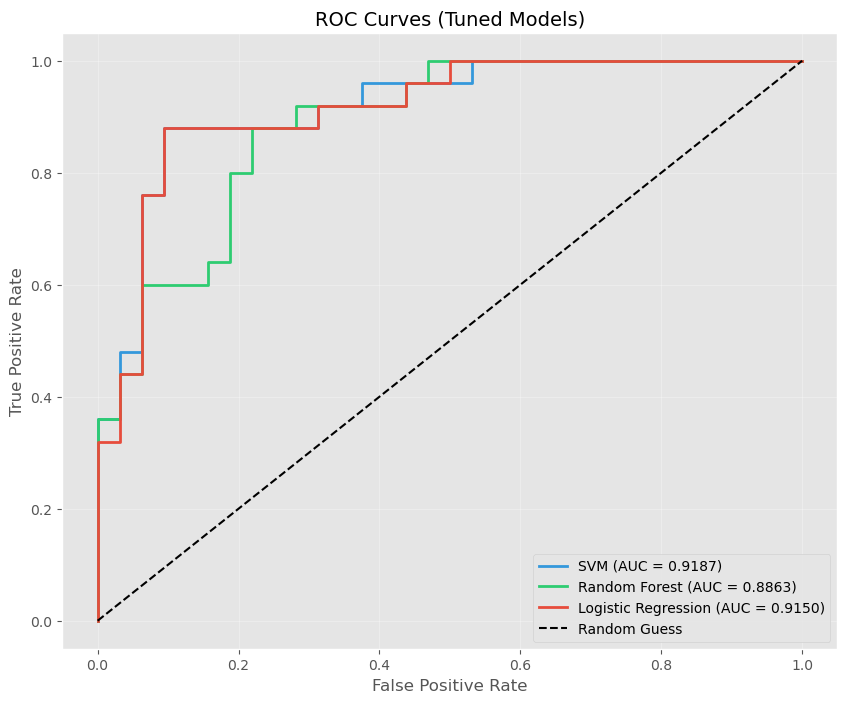

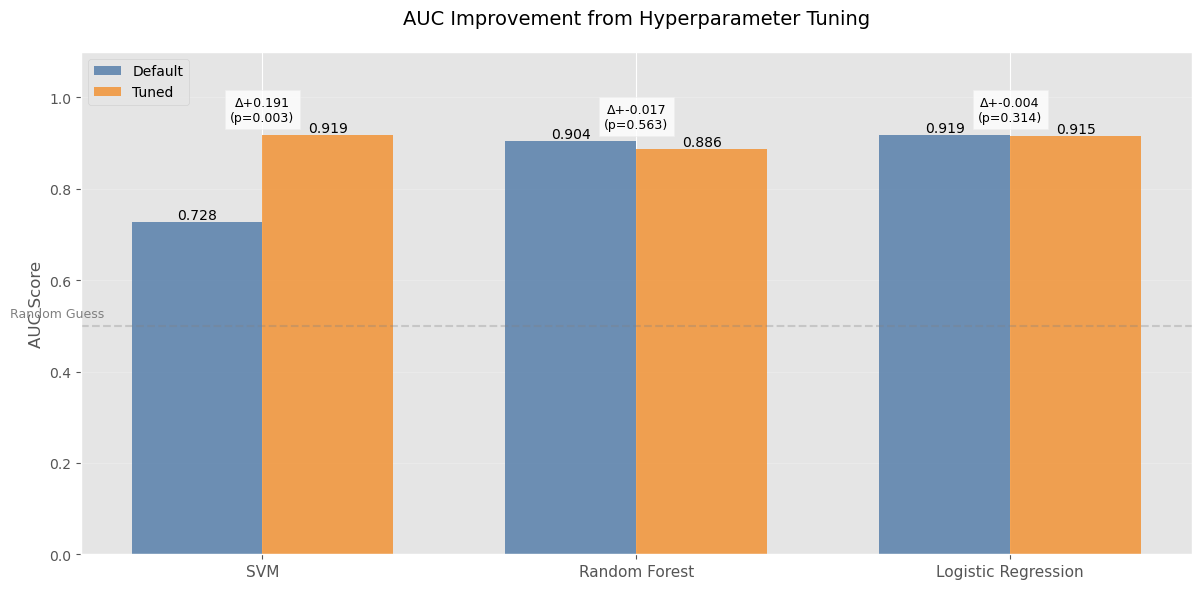

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score

# --- 1. Get AUC for Tuned Models (from your code) ---
y_svm_proba = grid_svm.decision_function(X_test)
y_rf_proba = grid_rf.predict_proba(X_test)[:, 1]
y_lr_proba = grid_lr.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_proba)

auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)
auc_lr = auc(fpr_lr, tpr_lr)

# --- 2. Get AUC for Default Models ---
default_svm = SVC(probability=True, random_state=42)
default_rf = RandomForestClassifier(random_state=42)
default_lr = LogisticRegression(random_state=42)

default_svm.fit(X_train, y_train)
default_rf.fit(X_train, y_train)
default_lr.fit(X_train, y_train)

default_svm_auc = roc_auc_score(y_test, default_svm.predict_proba(X_test)[:, 1])
default_rf_auc = roc_auc_score(y_test, default_rf.predict_proba(X_test)[:, 1])
default_lr_auc = roc_auc_score(y_test, default_lr.predict_proba(X_test)[:, 1])

# --- 3. Compare Default vs. Tuned AUC ---
auc_comparison = pd.DataFrame({
    "Model": ["SVM", "Random Forest", "Logistic Regression"],
    "Default AUC": [default_svm_auc, default_rf_auc, default_lr_auc],
    "Tuned AUC": [auc_svm, auc_rf, auc_lr],
    "Improvement": [auc_svm - default_svm_auc, auc_rf - default_rf_auc, auc_lr - default_lr_auc]
})

# --- 4. Statistical Significance Testing ---
def calculate_p_value(default_model, tuned_model):
    default_scores = cross_val_score(default_model, X_train, y_train, cv=5, scoring='roc_auc')
    tuned_scores = cross_val_score(tuned_model, X_train, y_train, cv=5, scoring='roc_auc')
    _, p_value = ttest_rel(default_scores, tuned_scores)
    return p_value

auc_comparison["p-value"] = [
    calculate_p_value(default_svm, grid_svm.best_estimator_),
    calculate_p_value(default_rf, grid_rf.best_estimator_),
    calculate_p_value(default_lr, grid_lr.best_estimator_)
]

# --- 5. Print Results ---
print("AUC Comparison: Default vs. Tuned Models")
print(auc_comparison.round(4))

# --- 6. Plot ROC Curves (Tuned Models) ---
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='#3498db', label=f"SVM (AUC = {auc_svm:.4f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, color='#2ecc71', label=f"Random Forest (AUC = {auc_rf:.4f})", linewidth=2)
plt.plot(fpr_lr, tpr_lr, color='#e74c3c', label=f"Logistic Regression (AUC = {auc_lr:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves (Tuned Models)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# --- 7. Plot AUC Improvement ---
plt.figure(figsize=(12, 6))
x = range(len(auc_comparison))
bar_width = 0.35

# Create bars with exact value labels
default_bars = plt.bar(x, auc_comparison["Default AUC"], width=bar_width, 
                      label='Default', color='#4e79a7', alpha=0.8)
tuned_bars = plt.bar([i + bar_width for i in x], auc_comparison["Tuned AUC"], 
                    width=bar_width, label='Tuned', color='#f28e2b', alpha=0.8)

# Add exact values on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

add_value_labels(default_bars)
add_value_labels(tuned_bars)

# Add improvement arrows and p-values
for i, (_, row) in enumerate(auc_comparison.iterrows()):
    max_height = max(row["Default AUC"], row["Tuned AUC"])
    plt.text(i + bar_width/2, max_height + 0.03, 
            f"Δ+{row['Improvement']:.3f}\n(p={row['p-value']:.3f})", 
            ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

# Customize plot
plt.xticks([i + bar_width/2 for i in x], auc_comparison["Model"], fontsize=11)
plt.ylabel("AUC Score", fontsize=12)
plt.title("AUC Improvement from Hyperparameter Tuning", fontsize=14, pad=20)
plt.ylim(0, 1.1)  # Leave room for annotations
plt.grid(axis='y', alpha=0.2)
plt.legend(loc='upper left', fontsize=10)

# Add horizontal line at random guess level
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
plt.text(-0.5, 0.52, 'Random Guess', color='gray', fontsize=9)

plt.tight_layout()
plt.show()

# Confusion Matrix

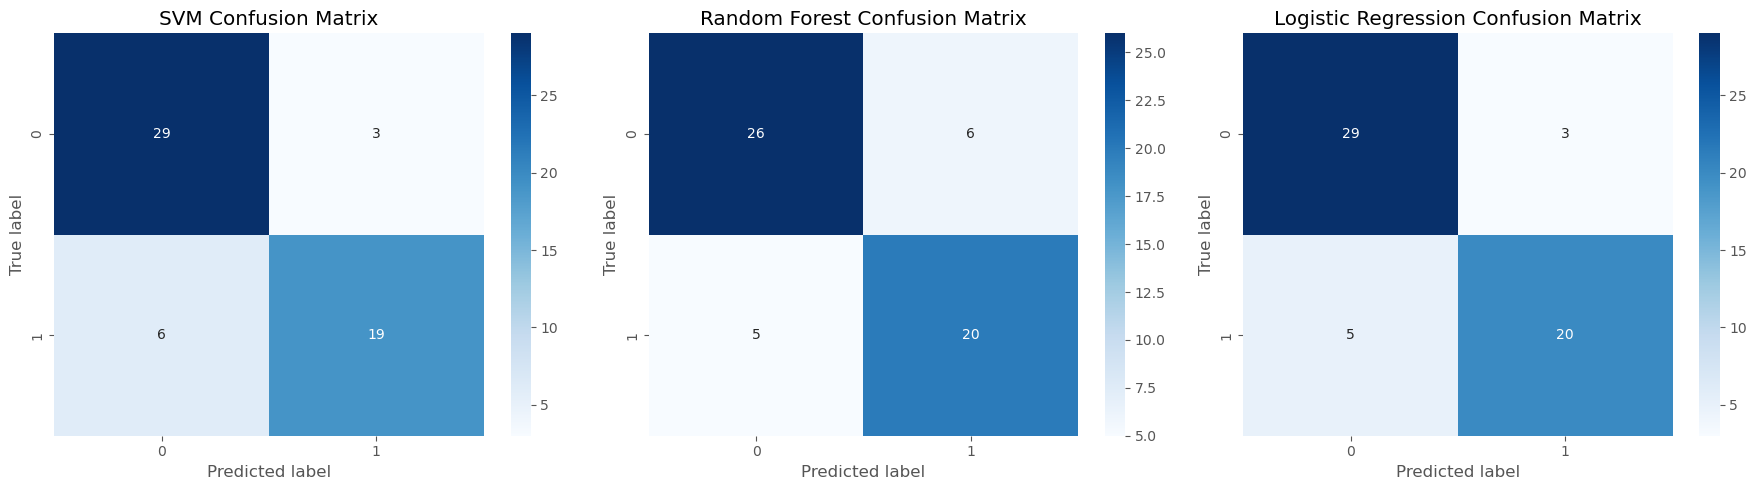

In [ ]:
# Compute and display confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_svm_pred)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", linewidths=0, ax=axes[0])
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")
axes[0].set_title("SVM Confusion Matrix")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_rf_pred)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", linewidths=0, ax=axes[1]) 
axes[1].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_title("Random Forest Confusion Matrix")

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_lr_pred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", linewidths=0, ax=axes[2])
axes[2].set_xlabel("Predicted label")
axes[2].set_ylabel("True label") 
axes[2].set_title("Logistic Regression Confusion Matrix")
# total 57
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the models (using all features)
joblib.dump(grid_svm.best_estimator_, "svm_model.pkl")
joblib.dump(grid_rf.best_estimator_, "rf_model.pkl")
joblib.dump(grid_lr.best_estimator_, "lr_model.pkl")

print("✅ All models saved successfully:")
print(" - SVM saved as svm_model.pkl")
print(" - Random Forest saved as rf_model.pkl")
print(" - Logistic Regression saved as lr_model.pkl")

✅ All models saved successfully:
 - SVM saved as svm_model.pkl
 - Random Forest saved as rf_model.pkl
 - Logistic Regression saved as lr_model.pkl


In [ ]:
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore")

# ============================
# Step 1: Choose an algorithm
# ============================
def choose_model():
    print("🔍 Choose a Machine Learning Algorithm:")
    print("1. SVM")
    print("2. Random Forest")
    print("3. Logistic Regression")

    choices = {"1": "svm_model.pkl", "2": "rf_model.pkl", "3": "lr_model.pkl"}

    while True:
        choice = input("👉 Enter your choice (1/2/3): ").strip()
        if choice in choices:
            model_file = choices[choice]
            print(f"\n✅ You selected: {model_file.split('_')[0].upper()} model\n")
            return model_file
        else:
            print("❌ Invalid choice. Please enter 1, 2, or 3.\n")

# ============================
# Step 2: Get user input
# ============================
def get_numeric_input(prompt, dtype=float, allowed_values=None):
    while True:
        try:
            value = dtype(input(prompt))
            if allowed_values and value not in allowed_values:
                print(f"❌ Invalid input! Allowed values: {allowed_values}\n")
                continue
            return value
        except ValueError:
            print("❌ Please enter a valid numeric value.\n")

def get_user_input():
    print("\n🔹 Welcome to the Heart Disease Prediction System 🔹")
    print("Please enter the following details:")

    age = get_numeric_input("👉 Enter Age (e.g., 20): ", int)                       
    sex = get_numeric_input("👉 Enter Sex [0=Female, 1=Male]: ", int, {0, 1})      
    cp = get_numeric_input("👉 Chest Pain Type [0=No Pain, 1=Typical Angina, 2=Atypical Angina, 3=Non-anginal, 4=Asymptomatic]: ", int, {0, 1, 2, 3, 4})  # 0
    trestbps = get_numeric_input("👉 Resting Blood Pressure (mm Hg) (e.g., 115): ", int)  
    chol = get_numeric_input("👉 Serum Cholesterol (mg/dl) (e.g., 170): ", int)    
    fbs = get_numeric_input("👉 Fasting Blood Sugar > 120 mg/dl? [0=No, 1=Yes]: ", int, {0, 1})  
    restecg = get_numeric_input("👉 Resting ECG [0=Normal, 1=ST-T wave abnormality, 2=Left ventricular hypertrophy]: ", int, {0, 1, 2})  
    thalach = get_numeric_input("👉 Max Heart Rate Achieved (e.g., 185): ", int)   
    exang = get_numeric_input("👉 Exercise-Induced Angina [0=No, 1=Yes]: ", int, {0, 1})  
    oldpeak = get_numeric_input("👉 ST Depression (Oldpeak) (e.g., 0.0): ", float) 
    slope = get_numeric_input("👉 Slope of ST Segment [0=Up, 1=Flat, 2=Down]: ", int, {0, 1, 2})  
    ca = get_numeric_input("👉 Number of Major Vessels (0-4): ", int, {0, 1, 2, 3, 4}) 
    thal = get_numeric_input("👉 Thalassemia Type [0=Normal, 1=Fixed defect, 2=Reversible defect, 3=Unknown]: ", int, {0, 1, 2, 3})  

    return np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

# ============================
# Step 3: Make prediction
# ============================
def predict():
    # Load models
    model_path = choose_model()
    model = joblib.load(model_path)
    
    # Get user input
    user_data = get_user_input()
        
    # Make prediction with all features
    prediction = model.predict(user_data_scaled)[0]
    
    print("\n🔹 Prediction Result 🔹")
    print("===================================")
    if prediction == 1:
        print("⚠️ **Heart Disease Detected!** ⚠️")
        print("Consult a doctor for further evaluation.")
    else:
        print("✅ **No Heart Disease Detected!** ✅")
        print("Maintain a healthy lifestyle! 🏃‍♂️🍎")
    print("===================================")
# Run the prediction system
predict()

🔍 Choose a Machine Learning Algorithm:
1. SVM
2. Random Forest
3. Logistic Regression


KeyboardInterrupt: Interrupted by user